<a href="https://colab.research.google.com/github/reza610/psea/blob/main/Lisa_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# prompt: get multiple files from github link

comorbid="https://raw.githubusercontent.com/reza610/psea/main/testdata/comorbid_file.csv"
value_expression = "https://raw.githubusercontent.com/reza610/psea/main/testdata/value_expression.csv"
simulated_data = "https://raw.githubusercontent.com/reza610/psea/main/testdata/simulated_binary_attribute_20241011155516.csv"
simulated_gene_expression = "https://raw.githubusercontent.com/reza610/psea/main/testdata/simulated_gene_exp_20241011155516.csv"

# Use raw.githubusercontent.com to access the raw CSV data
comorbid_df = pd.read_csv(comorbid, index_col=0)
value_expression_df = pd.read_csv(value_expression, index_col=0)
simulated_data_df = pd.read_csv(simulated_data, index_col=0)
simulated_gene_expression_df = pd.read_csv(simulated_gene_expression, index_col=0)

In [ ]:
not_binary_cols = [i for i in comorbid_df.iloc[:, 2:].columns if len(comorbid_df[i].unique()) < 2]

comorbid_binary_df = comorbid_df[comorbid_df.columns[~comorbid_df.columns.isin(not_binary_cols)]]

In [ ]:
# REZA

In [ ]:
# SRIHARI

simulated_gene_expression_df
simulated_data_df

,simulated_based_on_ENSG00000159259_Truesamplesize1_biassamplesize0_Zscorevaluebais1_sigma0.5_direction_top_pba0.0,simulated_based_on_ENSG00000160202_Truesamplesize1_biassamplesize0_Zscorevaluebais1_sigma0.5_direction_top_pba0.0,simulated_based_on_ENSG00000160294_Truesamplesize1_biassamplesize0_Zscorevaluebais1_sigma0.5_direction_top_pba0.0,simulated_based_on_ENSG00000224388_Truesamplesize1_biassamplesize0_Zscorevaluebais1_sigma0.5_direction_top_pba0.0,simulated_based_on_ENSG00000224427_Truesamplesize1_biassamplesize0_Zscorevaluebais1_sigma0.5_direction_top_pba0.0,simulated_based_on_ENSG00000224790_Truesamplesize1_biassamplesize0_Zscorevaluebais1_sigma0.5_direction_top_pba0.0,simulated_based_on_ENSG00000232777_Truesamplesize1_biassamplesize0_Zscorevaluebais1_sigma0.5_direction_top_pba0.0,simulated_based_on_ENSG00000237604_Truesamplesize1_biassamplesize0_Zscorevaluebais1_sigma0.5_direction_top_pba0.0,simulated_based_on_ENSG00000269950_Truesamplesize1_biassamplesize0_Zscorevaluebais1_sigma0.5_direction_top_pba0.0,simulated_based_on_ENSG00000279064_Truesamplesize1_biassamplesize0_Zscorevaluebais1_sigma0.5_direction_top_pba0.0,...,simulated_based_on_ENSG00000160202_Truesamplesize141_biassamplesize127_Zscorevaluebais3_sigma0.5_direction_top_pba0.9,simulated_based_on_ENSG00000160294_Truesamplesize141_biassamplesize127_Zscorevaluebais3_sigma0.5_direction_top_pba0.9,simulated_based_on_ENSG00000224388_Truesamplesize141_biassamplesize127_Zscorevaluebais3_sigma0.5_direction_top_pba0.9,simulated_based_on_ENSG00000224427_Truesamplesize141_biassamplesize127_Zscorevaluebais3_sigma0.5_direction_top_pba0.9,simulated_based_on_ENSG00000224790_Truesamplesize141_biassamplesize127_Zscorevaluebais3_sigma0.5_direction_top_pba0.9,simulated_based_on_ENSG00000232777_Truesamplesize141_biassamplesize127_Zscorevaluebais3_sigma0.5_direction_top_pba0.9,simulated_based_on_ENSG00000237604_Truesamplesize141_biassamplesize127_Zscorevaluebais3_sigma0.5_direction_top_pba0.9,simulated_based_on_ENSG00000269950_Truesamplesize141_biassamplesize127_Zscorevaluebais3_sigma0.5_direction_top_pba0.9,simulated_based_on_ENSG00000279064_Truesamplesize141_biassamplesize127_Zscorevaluebais3_sigma0.5_direction_top_pba0.9,Patient
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Abbey
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Addie
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,Adelind
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,Aila
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Alaine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Willyt
250,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Winifred
251,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Winny
252,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Winonah


In [ ]:
gene_lst = [i.split('_')[-1] for i in simulated_gene_expression_df.iloc[:, :-1].columns]
gene_lst.append('Patient')
value_expression_subset_df = value_expression_df[value_expression_df.columns.intersection(gene_lst)]

In [ ]:
value_expression_subset_df.head()

,ENSG00000159259,ENSG00000160202,ENSG00000160294,ENSG00000224388,ENSG00000224427,ENSG00000224790,ENSG00000232777,ENSG00000237604,ENSG00000269950,ENSG00000279064,Patient
0,124.272362,0.0,4744.914567,1.028856,0.0,11.589774,0.0,47.833824,6.995864,0.000000,pt-mv6fmz83
1,140.453156,0.0,4895.425472,0.000000,0.0,25.269569,0.0,75.076641,4.648160,5.640287,pt-pb67ypn9
3,149.923763,0.0,4705.318677,0.000000,0.0,3.341486,0.0,44.852369,0.000000,1.041781,pt-yky3kj4e
4,168.127735,0.0,4808.258190,1.537483,0.0,4.245430,0.0,86.574911,3.119734,0.000000,pt-bkgw6a6n
5,190.963347,0.0,5628.864670,0.000000,0.0,1.772680,0.0,36.744311,0.000000,11.670666,pt-a2d5sks2


In [ ]:
# Check for overlapping patients
common_patients = set(value_expression_subset_df['Patient']).intersection(set(comorbid_df['Patient']))
print(f"Number of common patients: {len(common_patients)}")

# Merge only common patients
merged_df = pd.merge(value_expression_subset_df, comorbid_binary_df, on='Patient', how='inner')
merged_df.head(20)

Number of common patients: 254


,ENSG00000159259,ENSG00000160202,ENSG00000160294,ENSG00000224388,ENSG00000224427,ENSG00000224790,ENSG00000232777,ENSG00000237604,ENSG00000269950,ENSG00000279064,...,food_dermatitis,polycythemia,aberrant_subclavian_artery,atrial_fibrillation,colorectal_carcinoma,congenital_pulmonary_venous_return_anomaly,juvenile_idiopathic_arthritis,schizophrenia,separation_anxiety_disorder,stereotypic_movement_disorder
0,124.272362,0.0,4744.914567,1.028856,0.0,11.589774,0.0,47.833824,6.995864,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,140.453156,0.0,4895.425472,0.000000,0.0,25.269569,0.0,75.076641,4.648160,5.640287,...,0,0,0,0,0,0,0,0,0,0
2,149.923763,0.0,4705.318677,0.000000,0.0,3.341486,0.0,44.852369,0.000000,1.041781,...,0,0,0,0,0,0,0,0,0,0
3,168.127735,0.0,4808.258190,1.537483,0.0,4.245430,0.0,86.574911,3.119734,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,190.963347,0.0,5628.864670,0.000000,0.0,1.772680,0.0,36.744311,0.000000,11.670666,...,0,0,0,0,0,0,0,0,0,0
5,156.499460,0.0,5348.225716,0.000000,0.0,26.280032,0.0,48.824753,10.763633,0.000000,...,0,0,0,0,0,0,0,0,0,0
6,114.090504,0.0,4884.098884,0.000000,0.0,1.489904,0.0,53.846050,3.128687,0.000000,...,0,0,0,0,0,0,0,0,0,0
7,127.411745,0.0,4523.168083,1.294249,0.0,0.000000,0.0,38.148406,2.471206,7.565484,...,0,0,0,0,0,0,0,0,0,0
8,267.960022,0.0,5647.660519,0.000000,0.0,10.990111,0.0,50.890040,7.824296,0.000000,...,0,0,0,0,0,0,0,0,0,0
9,160.487372,0.0,5450.376583,3.808624,0.0,25.295648,0.0,84.179770,6.697708,0.947708,...,0,0,0,0,0,0,0,0,0,0


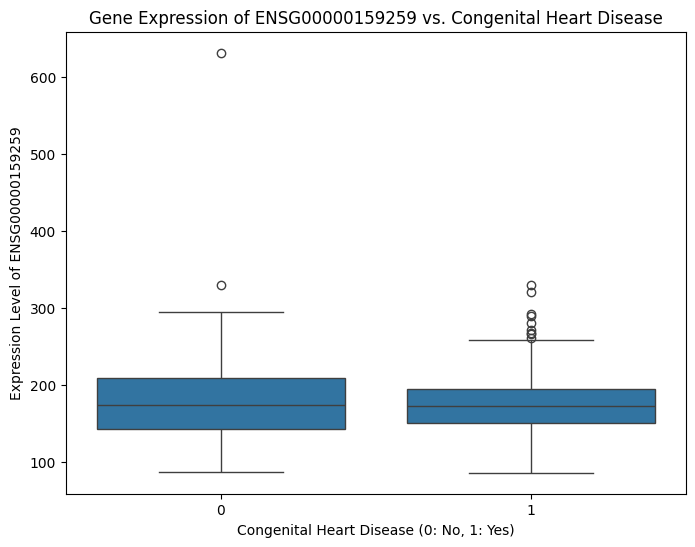

In [ ]:
# Example: Boxplot for a specific gene and a specific comorbidity
gene = 'ENSG00000159259'
comorbidity = 'congenital_heart_disease'

plt.figure(figsize=(8,6))
sns.boxplot(x=comorbidity, y=gene, data=merged_df)
plt.title(f'Gene Expression of {gene} vs. Congenital Heart Disease')
plt.xlabel('Congenital Heart Disease (0: No, 1: Yes)')
plt.ylabel(f'Expression Level of {gene}')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 2000x1000 with 0 Axes>

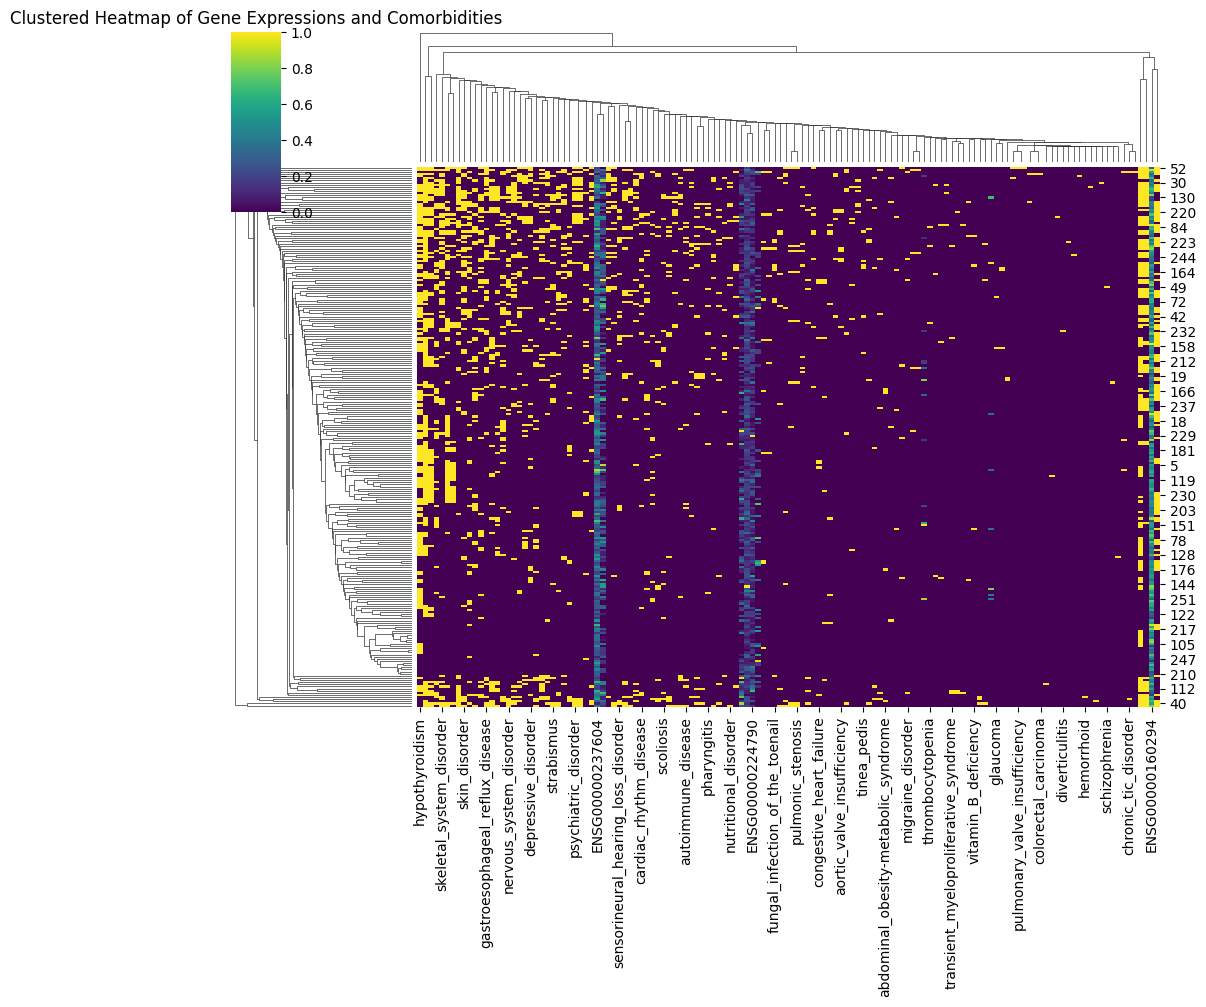

In [ ]:
# Select genes and comorbidities for heatmap
#gene_columns = value_expression_subset_df.columns[:-1].to_list()
#comorbidity_columns = comorbid_binary_df.columns[2:].to_list()

heatmap_columns = merged_df[merged_df.columns[~merged_df.columns.isin(['Patient', 'complete_trisomy_21'])]].columns.to_list()

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.clustermap(merged_df[heatmap_columns], metric='euclidean', standard_scale=1, cmap='viridis')
plt.title('Clustered Heatmap of Gene Expressions and Comorbidities')
plt.show()

In [ ]:
# Example: T-test for a gene and a comorbidity
gene = 'ENSG00000159259'
comorbidity = 'congenital_heart_disease'

group1 = merged_df[merged_df[comorbidity] == 1][gene]
group0 = merged_df[merged_df[comorbidity] == 0][gene]

t_stat, p_val = ttest_ind(group1, group0, nan_policy='omit')

print(f'T-test results for {gene} vs {comorbidity}:')
print(f'T-statistic: {t_stat}, P-value: {p_val}')


T-test results for ENSG00000159259 vs congenital_heart_disease:
T-statistic: -1.159260075817238, P-value: 0.2474474599111476


In [ ]:
# Define the list of genes you want to test
genes = ['ENSG00000159259', 'ENSG00000160202', 'ENSG00000160294',
         'ENSG00000224388', 'ENSG00000224427', 'ENSG00000224790',
         'ENSG00000232777', 'ENSG00000237604', 'ENSG00000269950',
         'ENSG00000279064']
comorbidity = 'congenital_heart_disease'

# Initialize a list to store the results
results = []

# Loop through each gene to perform the Wilcoxon rank sum test
for gene in genes:
    # Extract gene expression data for patients with and without congenital heart disease
    group1 = merged_df[merged_df[comorbidity] == 1][gene]
    group0 = merged_df[merged_df[comorbidity] == 0][gene]

    # Perform the Wilcoxon Rank Sum Test (Mann-Whitney U test)
    stat, p_value = mannwhitneyu(group1, group0, alternative='two-sided')

    # Append the results to the list
    results.append((gene, stat, p_value))

# Convert results to DataFrame for easier interpretation
results_df = pd.DataFrame(results, columns=['Gene', 'Statistic', 'P-Value'])

# Display the results
print(results_df)

              Gene  Statistic   P-Value
0  ENSG00000159259     7426.0  0.353388
1  ENSG00000160202     7936.0  0.892600
2  ENSG00000160294     7545.0  0.469357
3  ENSG00000224388     7764.0  0.624999
4  ENSG00000224427     7654.5  0.076835
5  ENSG00000224790     8393.0  0.464092
6  ENSG00000232777     7896.0  0.267378
7  ENSG00000237604     8417.0  0.439307
8  ENSG00000269950     7537.0  0.455094
9  ENSG00000279064     8557.0  0.288333


In [ ]:
# Get the list of p-values
p_values = results_df['P-Value'].values

# Apply FDR correction
corrected_pvals = multipletests(p_values, method='fdr_bh')[1]

# Add corrected p-values to the results DataFrame
results_df['Corrected P-Value'] = corrected_pvals

# Display the updated results
print(results_df)

              Gene  Statistic   P-Value  Corrected P-Value
0  ENSG00000159259     7426.0  0.353388           0.586696
1  ENSG00000160202     7936.0  0.892600           0.892600
2  ENSG00000160294     7545.0  0.469357           0.586696
3  ENSG00000224388     7764.0  0.624999           0.694443
4  ENSG00000224427     7654.5  0.076835           0.586696
5  ENSG00000224790     8393.0  0.464092           0.586696
6  ENSG00000232777     7896.0  0.267378           0.586696
7  ENSG00000237604     8417.0  0.439307           0.586696
8  ENSG00000269950     7537.0  0.455094           0.586696
9  ENSG00000279064     8557.0  0.288333           0.586696
